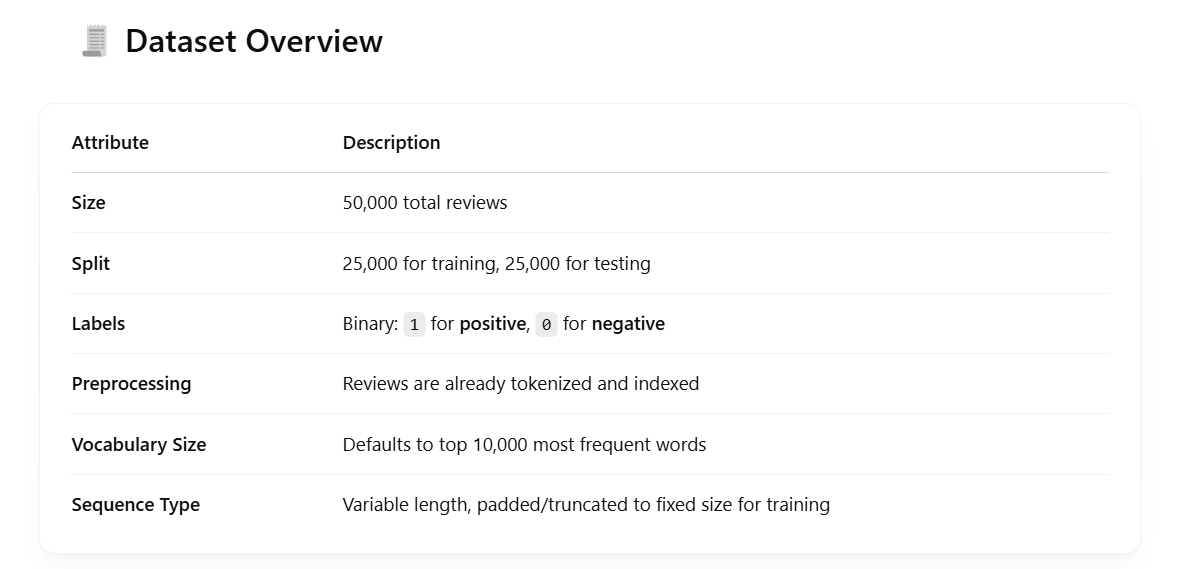

# **IMPORTING LIBRARIES:**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,Embedding,LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000) #loading the dataset

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# observe the dataset:-
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
imdb.get_word_index() #observing the index and the particular corresponding word

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In this library the datasets are already tokenized.so we can direcly jump into the padding & model building part

In [7]:
#Padding:-
x_train=pad_sequences(x_train,maxlen=256,padding='post')
x_test=pad_sequences(x_test,maxlen=256,padding='post')

In [8]:
x_train

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]], dtype=int32)

# **MODEL BUILDING:-**

In [9]:
from tensorflow.keras.models import Sequential   # Model building
model=Sequential(
    [

     Embedding(10000,32,input_length=256, input_shape=(256,)),
     SimpleRNN(32),
     Dropout(0.2),
     Dense(1,activation='sigmoid')


    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy']) #Model compilation

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
hostory=model.fit(x_train,y_train,batch_size=130,epochs=7,verbose=1,validation_split=0.2) # Training the model

Epoch 1/7
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - Accuracy: 0.7084 - loss: 0.4458 - val_Accuracy: 0.5206 - val_loss: 0.8461
Epoch 2/7
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - Accuracy: 0.7124 - loss: 0.4354 - val_Accuracy: 0.5226 - val_loss: 0.8291
Epoch 3/7
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - Accuracy: 0.7169 - loss: 0.4473 - val_Accuracy: 0.5302 - val_loss: 0.8625
Epoch 4/7
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Accuracy: 0.7255 - loss: 0.4267 - val_Accuracy: 0.5192 - val_loss: 0.8893
Epoch 5/7
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Accuracy: 0.7274 - loss: 0.4298 - val_Accuracy: 0.5260 - val_loss: 0.9565
Epoch 6/7
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - Accuracy: 0.7389 - loss: 0.4190 - val_Accuracy: 0.5292 - val_loss: 0.8992
Epoch 7/7
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Accuracy: 0.7515 - loss: 0.4037 - val_Accuracy: 0.5304 - val_loss: 0.9103


In [16]:
# TESTING PART
model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - Accuracy: 0.5189 - loss: 0.9201


[0.9277540445327759, 0.5220400094985962]

# Here we can see that the model is suffering from overfitting.

# **Lets compile with LSTM:-**

In [17]:
# Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=256),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5116 - loss: 0.6925 - val_accuracy: 0.5574 - val_loss: 0.6816
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5868 - loss: 0.6648 - val_accuracy: 0.5746 - val_loss: 0.6408
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6558 - loss: 0.5988 - val_accuracy: 0.6000 - val_loss: 0.6297
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6285 - loss: 0.5949 - val_accuracy: 0.5788 - val_loss: 0.6432
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6287 - loss: 0.5673 - val_accuracy: 0.6110 - val_loss: 0.6166


In [21]:
# Test
model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6013 - loss: 0.6203


[0.6213859915733337, 0.5948399901390076]

This time we reduce overfitting issue but still the model accuracy is low.

# **Using Regularization technique:-**

In [23]:
# Model
from keras.regularizers import l1_l2
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=256),
    Dropout(0.3),
    LSTM(64,dropout=0.2,recurrent_dropout=0.2,kernel_regularizer=l1_l2),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
# callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=2, monitor='val_loss', restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1)
]


In [29]:
# Train
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2,callbacks=callbacks)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 884ms/step - accuracy: 0.5138 - loss: 0.6927 - val_accuracy: 0.5628 - val_loss: 0.6739 - learning_rate: 0.0010
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 875ms/step - accuracy: 0.5739 - loss: 0.6783 - val_accuracy: 0.5606 - val_loss: 0.6550 - learning_rate: 0.0010
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 864ms/step - accuracy: 0.6083 - loss: 0.6191 - val_accuracy: 0.6118 - val_loss: 0.6105 - learning_rate: 0.0010
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 138s 830ms/step - accuracy: 0.6315 - loss: 0.5702 - val_accuracy: 0.6176 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 854ms/step - accuracy: 0.7543 - loss: 0.4973 - val_accuracy: 0.5364 - val_loss: 0.6823 - learning_rate: 0.0010
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 892ms/step - accuracy: 0.5741 - loss: 0.6553 - val_accuracy: 0.7020 - val_loss: 0.5853 - learning_rate: 5.0000e-04
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 882ms/step - ac

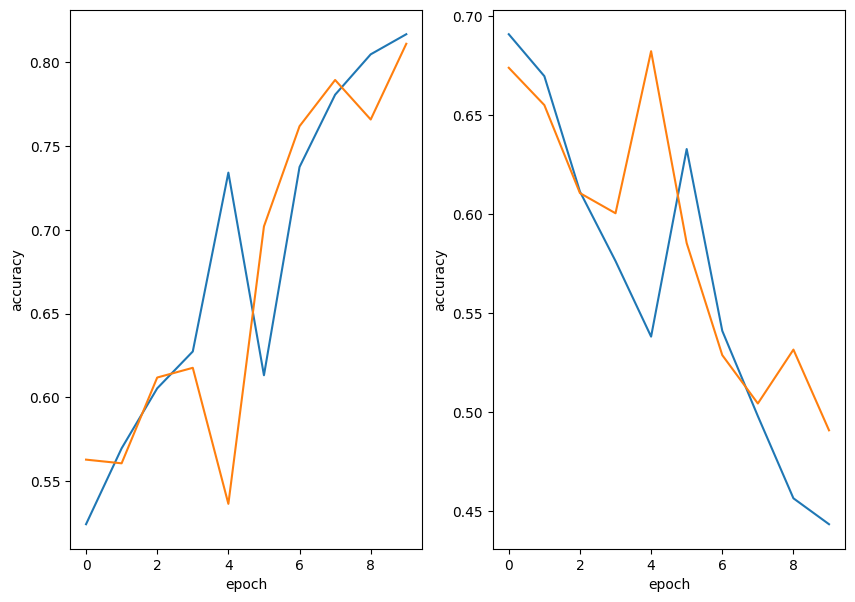

In [34]:
# visualization of performence:-
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='accuracy')
plt.plot(history.history['val_loss'],label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [30]:
#TEST
model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.8070 - loss: 0.4915


[0.4901718497276306, 0.8059999942779541]

## This is how step by step we increase the model performence.